In [212]:
import pandas as pd
import numpy as np
import sqlite3

# Reconnect to the database
conn = sqlite3.connect('./ipl_database.db')
# Query the database
df_ball = pd.read_sql_query('SELECT * FROM ipl_ball_by_ball;', conn)

# Display the first few rows of the table
print(df_ball)

# Close the connection
conn.close()


             ID  innings  overs  ballnumber       batter          bowler   
0       1312200        1      0           1  YBK Jaiswal  Mohammed Shami  \
1       1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2       1312200        1      0           3   JC Buttler  Mohammed Shami   
3       1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4       1312200        1      0           5  YBK Jaiswal  Mohammed Shami   
...         ...      ...    ...         ...          ...             ...   
225949   335982        2     14           5      P Kumar        I Sharma   
225950   335982        2     14           6     SB Joshi        I Sharma   
225951   335982        2     14           7      P Kumar        I Sharma   
225952   335982        2     15           1     SB Joshi       LR Shukla   
225953   335982        2     15           2     SB Joshi       LR Shukla   

        non-striker extra_type  batsman_run  extras_run  total_run   
0        JC Buttl

In [213]:
unique_batters = df_ball['batter'].unique().tolist()

print(unique_batters)

['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Ashwin', 'R Parag', 'TA Boult', 'OC McCoy', 'WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller', 'V Kohli', 'F du Plessis', 'RM Patidar', 'GJ Maxwell', 'MK Lomror', 'KD Karthik', 'Shahbaz Ahmed', 'PWH de Silva', 'HV Patel', 'JR Hazlewood', 'Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda', 'MP Stoinis', 'E Lewis', 'KH Pandya', 'PVD Chameera', 'PK Garg', 'Abhishek Sharma', 'RA Tripathi', 'AK Markram', 'N Pooran', 'Washington Sundar', 'R Shepherd', 'J Suchith', 'B Kumar', 'Umran Malik', 'JM Bairstow', 'S Dhawan', 'M Shahrukh Khan', 'MA Agarwal', 'LS Livingstone', 'JM Sharma', 'PN Mankad', 'PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant', 'SN Khan', 'R Powell', 'AR Patel', 'SN Thakur', 'Kuldeep Yadav', 'Ishan Kishan', 'RG Sharma', 'D Brevis', 'Tilak Varma', 'TH David', 'Ramandeep Singh', 'DR Sams', 'RD Gaikwad', 'DP Conway', 'MM Ali', 'N Jagadeesan', 'AT Rayudu', 'MS Dhoni', 'Simarjeet Singh', 'MJ Santner', 'R 

In [214]:
import sqlite3
import pandas as pd

def get_batting_stats(player_name):
    # Establish a connection to the SQLite database
    conn = sqlite3.connect('./ipl_database.db')

    # Define the SQL query with the corrected column name
    query = f'''
    SELECT
        innings,
        overs,
        SUM(CASE WHEN batter = ? THEN batsman_run ELSE 0 END) AS runs_scored,
        SUM((CASE WHEN isWicketDelivery = 1 AND player_out == ? THEN 1 ELSE 0 END)) AS Dismissals,
        COUNT(CASE WHEN (extra_type IS NULL OR extra_type = 'byes' OR extra_type = 'legbyes' OR extra_type = 'noballs') AND (batter = ?) THEN 1 ELSE NULL END) AS balls_faced,
        COUNT(CASE WHEN (extra_type IS NULL OR extra_type = 'byes' OR extra_type = 'legbyes' OR extra_type = 'noballs') AND (batter = ?) THEN 1 ELSE NULL END) AS balls_faced,
        COUNT(CASE WHEN (batsman_run = 6) AND (batter = ?) THEN 1 ELSE NULL END) AS Sixes,
        COUNT(CASE WHEN (batsman_run = 4) AND (batter = ?) THEN 1 ELSE NULL END) AS Fours
    FROM
        ipl_ball_by_ball
    WHERE
        batter = ? or "non-striker" = ?
    GROUP BY
        innings,
        overs
    ORDER BY
        innings,
        overs;
    '''

    # Execute the query with the player name as a parameter
    df = pd.read_sql_query(query, conn, params=(player_name, player_name, player_name, player_name, player_name, player_name, player_name, player_name))

    # Close the connection
    conn.close()
    df["Sixer_Percentage"] = df["Sixes"]*6/ df["runs_scored"]
    df["Four_Percentage"] = df["Fours"]*4/ df["runs_scored"]
    return df

# Example usage
player_name = 'AB de Villiers'  # Replace with the actual player name
batter_stats_df = get_batting_stats(player_name)
batter_stats_df

,innings,overs,runs_scored,Dismissals,balls_faced,Sixes,Fours,Sixer_Percentage,Four_Percentage
0,1,0,19,0,10,0,4,0.000000,0.842105
1,1,1,22,1,23,0,4,0.000000,0.727273
2,1,2,28,1,38,1,2,0.214286,0.285714
3,1,3,83,0,76,4,9,0.289157,0.433735
4,1,4,114,2,72,3,16,0.157895,0.561404
5,1,5,144,2,92,4,21,0.166667,0.583333
6,1,6,118,2,95,1,10,0.050847,0.338983
7,1,7,110,4,97,1,9,0.054545,0.327273
8,1,8,127,2,105,3,11,0.141732,0.346457
9,1,9,162,2,120,6,7,0.222222,0.172840


In [215]:
# Assuming you have a DataFrame named batter_stats_df
# Filter the DataFrame based on innings, overs range, and runs scored
innings_x = 1  # Specify the innings
overs_y = 6  # Specify the starting over
overs_z = 10  # Specify the ending over

filtered_batter_df = batter_stats_df[
    (batter_stats_df['innings'].isin([1, 2])) &  # Filter by innings
    (batter_stats_df['overs'] >= overs_y) &      # Filter by starting over
    (batter_stats_df['overs'] <= overs_z)
]

# Print the filtered DataFrame
filtered_batter_df

,innings,overs,runs_scored,Dismissals,balls_faced,Sixes,Fours,Sixer_Percentage,Four_Percentage
6,1,6,118,2,95,1,10,0.050847,0.338983
7,1,7,110,4,97,1,9,0.054545,0.327273
8,1,8,127,2,105,3,11,0.141732,0.346457
9,1,9,162,2,120,6,7,0.222222,0.172840
10,1,10,172,5,134,7,10,0.244186,0.232558
26,2,6,93,5,95,0,7,0.000000,0.301075
27,2,7,111,3,99,3,6,0.162162,0.216216
28,2,8,133,4,113,4,11,0.180451,0.330827
29,2,9,133,3,106,6,8,0.270677,0.240602
30,2,10,136,4,103,7,9,0.308824,0.264706


In [216]:
def stat(player_name, batter_stats_df, overs_y, overs_z):
    # Assuming you have a DataFrame named batter_stats_df
    # Filter the DataFrame based on innings, overs range, and runs scored
     # Specify the ending over

    filtered_batter_df = batter_stats_df[
        (batter_stats_df['innings'].isin([1, 2])) &  # Filter by innings
        (batter_stats_df['overs'] >= overs_y) &      # Filter by starting over
        (batter_stats_df['overs'] <= overs_z)
    ]

    print(filtered_batter_df)

    # Print the filtered DataFrame
    runs_score = filtered_batter_df["runs_scored"].sum()
    balls_faced = filtered_batter_df["balls_faced"].sum()
    dismissals = filtered_batter_df["Dismissals"].sum()
    average = runs_score/dismissals
    strike_rate = (runs_score/balls_faced)*100
    sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
    four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
    print(player_name)
    print(runs_score, balls_faced, dismissals, average, strike_rate)

    return [player_name, runs_score, balls_faced, dismissals, average, strike_rate, four_percentage, sixer_percentage]

stat("AB de Villiers", get_batting_stats("AB de Villiers"), 6, 10)

    innings  overs  runs_scored  Dismissals  balls_faced  Sixes  Fours   
6         1      6          118           2           95      1     10  \
7         1      7          110           4           97      1      9   
8         1      8          127           2          105      3     11   
9         1      9          162           2          120      6      7   
10        1     10          172           5          134      7     10   
26        2      6           93           5           95      0      7   
27        2      7          111           3           99      3      6   
28        2      8          133           4          113      4     11   
29        2      9          133           3          106      6      8   
30        2     10          136           4          103      7      9   

    Sixer_Percentage  Four_Percentage  
6           0.050847         0.338983  
7           0.054545         0.327273  
8           0.141732         0.346457  
9           0.222222     

['AB de Villiers',
 1295,
 1067,
 34,
 38.088235294117645,
 121.36832239925025,
 0.27181467181467184,
 0.17606177606177606]

In [217]:
runs_score = filtered_batter_df["runs_scored"].sum()
balls_faced = filtered_batter_df["balls_faced"].sum()
dismissals = filtered_batter_df["Dismissals"].sum()
average = runs_score/dismissals
strike_rate = (runs_score/balls_faced)*100
print(runs_score, balls_faced, dismissals, average, strike_rate)

1295 1067 34 38.088235294117645 121.36832239925025


In [218]:
def batting_stats_overs(player_name, batter_stats_df , overs_y, overs_z):

    filtered_batter_df = batter_stats_df[
        (batter_stats_df['innings'].isin([1, 2])) &  # Filter by innings
        (batter_stats_df['overs'] >= overs_y) &      # Filter by starting over
        (batter_stats_df['overs'] <= overs_z)
    ]


    runs_score = filtered_batter_df["runs_scored"].sum()
    balls_faced = filtered_batter_df["balls_faced"].sum()
    dismissals = filtered_batter_df["Dismissals"].sum()
    sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
    four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
    average = runs_score/dismissals
    strike_rate = (runs_score/balls_faced)*100
    
    return [player_name, runs_score, balls_faced, dismissals, average, strike_rate, four_percentage, sixer_percentage]

# Best Batters in the Powerplay

In [219]:
batting_power_play = []
for i in unique_batters:
    df = get_batting_stats(i)
    batting_power_play.append(batting_stats_overs(i, df, 0, 5))

C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:15: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipy

In [220]:
batting_power_play

[['YBK Jaiswal',
  366,
  272,
  12,
  30.5,
  134.55882352941177,
  0.5245901639344263,
  0.22950819672131148],
 ['JC Buttler',
  1229,
  854,
  26,
  47.26923076923077,
  143.9110070257611,
  0.5109845402766476,
  0.26851098454027666],
 ['SV Samson',
  999,
  849,
  35,
  28.542857142857144,
  117.6678445229682,
  0.4844844844844845,
  0.18018018018018017],
 ['D Padikkal',
  631,
  512,
  19,
  33.21052631578947,
  123.2421875,
  0.5388272583201268,
  0.12361331220285261],
 ['SO Hetmyer',
  53,
  51,
  2,
  26.5,
  103.921568627451,
  0.4528301886792453,
  0.22641509433962265],
 ['R Ashwin',
  58,
  56,
  4,
  14.5,
  103.57142857142858,
  0.6206896551724138,
  0.20689655172413793],
 ['R Parag', 0, 11, 1, 0.0, 0.0, nan, nan],
 ['TA Boult', 0, 0, 0, nan, nan, nan, nan],
 ['OC McCoy', 0, 0, 0, nan, nan, nan, nan],
 ['WP Saha',
  972,
  727,
  35,
  27.771428571428572,
  133.70013755158183,
  0.551440329218107,
  0.18518518518518517],
 ['Shubman Gill',
  882,
  729,
  22,
  40.090909090

In [221]:
batting_power_play_df = pd.DataFrame(batting_power_play, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage'])
batting_power_play_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,YBK Jaiswal,366,272,12,30.500000,134.558824,0.524590,0.229508
1,JC Buttler,1229,854,26,47.269231,143.911007,0.510985,0.268511
2,SV Samson,999,849,35,28.542857,117.667845,0.484484,0.180180
3,D Padikkal,631,512,19,33.210526,123.242188,0.538827,0.123613
4,SO Hetmyer,53,51,2,26.500000,103.921569,0.452830,0.226415
...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,0,0,0,NaN,NaN,NaN,NaN
601,MA Khote,0,0,0,NaN,NaN,NaN,NaN
602,SB Joshi,0,0,0,NaN,NaN,NaN,NaN
603,DS Lehmann,4,3,0,inf,133.333333,1.000000,0.000000


In [222]:
sorted_batting_powerplay_df = batting_power_play_df.sort_values('runs', ascending=False)
filtered_sorted_batting_powerplay_df = sorted_batting_powerplay_df.query('runs >= 500').dropna()
print(len(filtered_sorted_batting_powerplay_df))
filtered_sorted_batting_powerplay_df

54


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
43,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938
50,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647
189,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568
280,G Gambhir,2277,1868,69,33.000000,121.895075,0.544576,0.089592
14,V Kohli,2125,1825,58,36.637931,116.438356,0.506353,0.121412
101,AM Rahane,2049,1783,65,31.523077,114.918676,0.532943,0.108346
105,RV Uthappa,2035,1636,62,32.822581,124.388753,0.513022,0.147420
242,PA Patel,1904,1565,73,26.082192,121.661342,0.594538,0.097689
59,RG Sharma,1632,1389,55,29.672727,117.494600,0.460784,0.231618
24,Q de Kock,1631,1248,45,36.244444,130.689103,0.446352,0.239117


In [223]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_powerplay_df = filtered_sorted_batting_powerplay_df.reset_index(drop=True)
len(filtered_sorted_batting_powerplay_df)

54

In [224]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
data = filtered_sorted_batting_powerplay_df
# Handle missing values
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage']])

# Create and train the neural network
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(5,)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')
model.fit(X, X, epochs=100, batch_size=32, verbose=0)

# Inspect the model's summary to find the correct layer name
model.summary()

encoder = tf.keras.Model(model.input, model.layers[-2].output)
print(encoder)
encoded_data = encoder.predict(X)
print("encoder data")
print(encoded_data)
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Assign the cluster labels back to the original data
data['Cluster'] = labels

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 32)                192       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_57 (Dense)            (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_58 (Dense)            (None, 8)                 136       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 dense_59 (Dense)            (None, 1)               

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [225]:
type(encoded_data)

numpy.ndarray

In [226]:
encoded_data.shape

(54, 8)

In [227]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
27,AJ Finch,910,793,38,23.947368,114.754098,0.527473,0.164835,2
39,M Vohra,681,529,25,27.240000,128.733459,0.422907,0.237885,2
20,MA Agarwal,1176,966,50,23.520000,121.739130,0.465986,0.193878,2
30,SS Iyer,858,773,24,35.750000,110.996119,0.498834,0.139860,2
34,AT Rayudu,777,732,23,33.782609,106.147541,0.478764,0.185328,2
12,M Vijay,1574,1375,50,31.480000,114.472727,0.447268,0.175349,2
24,JH Kallis,1036,982,34,30.470588,105.498982,0.579151,0.086873,2
25,SV Samson,999,849,35,28.542857,117.667845,0.484484,0.180180,2
43,Mandeep Singh,629,546,32,19.656250,115.201465,0.597774,0.076312,2
48,SC Ganguly,529,518,19,27.842105,102.123552,0.574669,0.102079,2


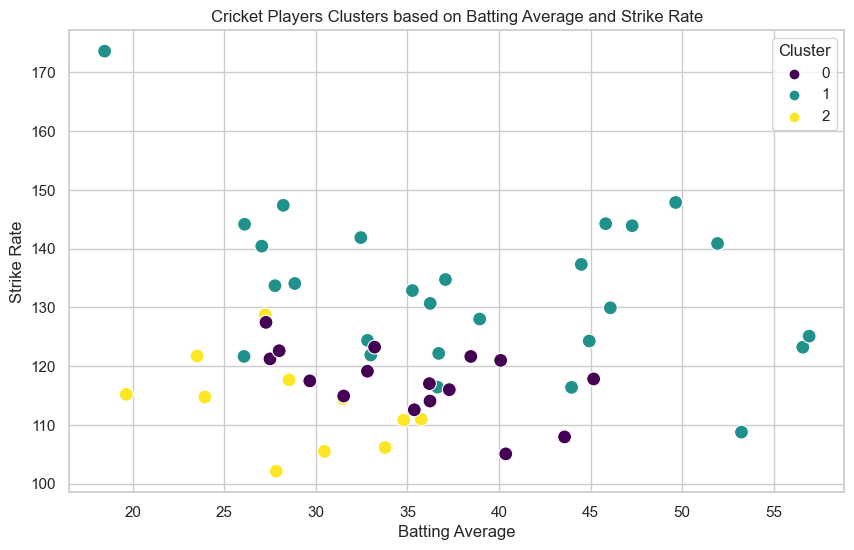

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [229]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans

# Assuming 'filtered_sorted_batting_powerplay_df' is your DataFrame
data = filtered_sorted_batting_powerplay_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage']])

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5
input_data = Input(shape=(input_shape,))

# Build the autoencoder model
encoded = Dense(32, activation='relu')(input_data)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Bottleneck layer

decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_shape, activation='linear')(decoded)  # Output layer with same size as input

autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(X, X,
                          epochs=100,
                          batch_size=32,
                          shuffle=True,
                          verbose=0,
                          validation_split=0.2)  # Add validation split for model evaluation

# Encode the data using the trained encoder
encoded_data = encoder.predict(X)

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Add the cluster labels back to the original DataFrame
data['Cluster'] = labels

2/2 [==============================] - 0s 3ms/step


c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [230]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
27,AJ Finch,910,793,38,23.947368,114.754098,0.527473,0.164835,2
20,MA Agarwal,1176,966,50,23.520000,121.739130,0.465986,0.193878,2
23,MK Pandey,1087,953,30,36.233333,114.060860,0.522539,0.121435,2
24,JH Kallis,1036,982,34,30.470588,105.498982,0.579151,0.086873,2
25,SV Samson,999,849,35,28.542857,117.667845,0.484484,0.180180,2
28,R Dravid,905,832,17,53.235294,108.774038,0.654144,0.046409,2
29,Shubman Gill,882,729,22,40.090909,120.987654,0.526077,0.108844,2
30,SS Iyer,858,773,24,35.750000,110.996119,0.498834,0.139860,2
31,MEK Hussey,828,767,19,43.578947,107.953064,0.507246,0.115942,2
34,AT Rayudu,777,732,23,33.782609,106.147541,0.478764,0.185328,2


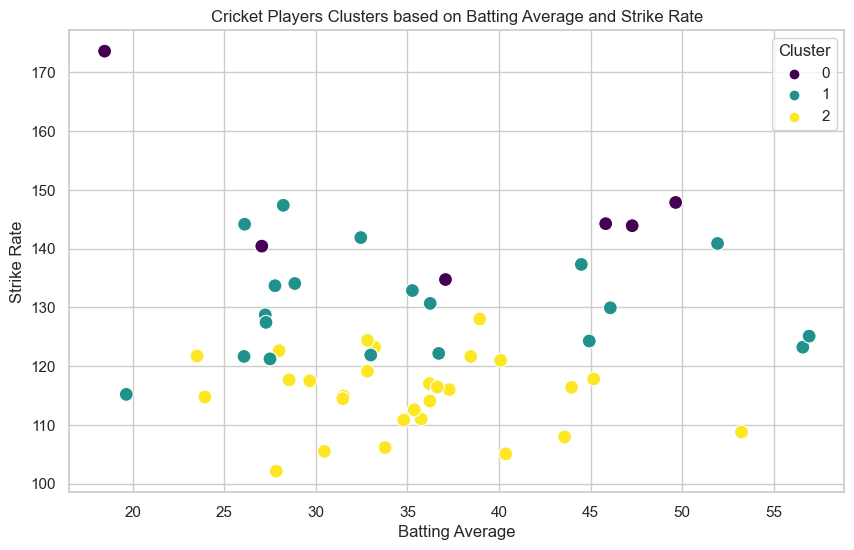

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [232]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming 'filtered_sorted_batting_powerplay_df' is your DataFrame
data = filtered_sorted_batting_powerplay_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
X = torch.tensor(X, dtype=torch.float32)

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5

class Autoencoder(nn.Module):
    def __init__(self, input_shape, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Tanh()  # Use Tanh activation for output layer as it's similar to Linear activation in Keras
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_shape, encoding_dim)
encoder = autoencoder.encoder

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Create a DataLoader for efficient data loading
batch_size = 32
data_loader = DataLoader(torch.utils.data.TensorDataset(X), batch_size=batch_size, shuffle=True)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        inputs = data[0]  # Access input data only
        optimizer.zero_grad()

        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

# Encode the data using the trained encoder
encoded_data = encoder(X).detach().numpy()

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Convert encoded_data and labels to DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=[f'Feature_{i+1}' for i in range(encoding_dim)])
labels_df = pd.DataFrame(labels, columns=['Cluster'])


Epoch 1, Loss: 1.0015655159950256
Epoch 2, Loss: 1.0041902661323547
Epoch 3, Loss: 0.9945042729377747
Epoch 4, Loss: 0.9676507711410522
Epoch 5, Loss: 1.023349016904831
Epoch 6, Loss: 1.027470976114273
Epoch 7, Loss: 0.9690861701965332
Epoch 8, Loss: 1.0113697946071625
Epoch 9, Loss: 1.0011839866638184
Epoch 10, Loss: 1.004918247461319
Epoch 11, Loss: 1.0366161167621613
Epoch 12, Loss: 0.9883107841014862
Epoch 13, Loss: 0.9912472069263458
Epoch 14, Loss: 0.9585305154323578
Epoch 15, Loss: 1.0074782371520996
Epoch 16, Loss: 0.968423068523407
Epoch 17, Loss: 0.9582095742225647
Epoch 18, Loss: 1.014803260564804
Epoch 19, Loss: 0.9675408005714417
Epoch 20, Loss: 0.9801170527935028
Epoch 21, Loss: 0.9560899436473846
Epoch 22, Loss: 0.95604607462883
Epoch 23, Loss: 0.9960866868495941
Epoch 24, Loss: 0.91915163397789
Epoch 25, Loss: 0.946044921875
Epoch 26, Loss: 0.9233205020427704
Epoch 27, Loss: 0.9730265438556671
Epoch 28, Loss: 0.9044618010520935
Epoch 29, Loss: 0.9746658802032471
Epoch 3

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [233]:
filtered_sorted_batting_powerplay_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938
1,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647
2,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568
3,G Gambhir,2277,1868,69,33.000000,121.895075,0.544576,0.089592
4,V Kohli,2125,1825,58,36.637931,116.438356,0.506353,0.121412
5,AM Rahane,2049,1783,65,31.523077,114.918676,0.532943,0.108346
6,RV Uthappa,2035,1636,62,32.822581,124.388753,0.513022,0.147420
7,PA Patel,1904,1565,73,26.082192,121.661342,0.594538,0.097689
8,RG Sharma,1632,1389,55,29.672727,117.494600,0.460784,0.231618
9,Q de Kock,1631,1248,45,36.244444,130.689103,0.446352,0.239117


In [234]:
combined_data = pd.concat([filtered_sorted_batting_powerplay_df, labels_df], axis=1)
combined_data.head(5)

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938,0
1,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647,0
2,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568,0
3,G Gambhir,2277,1868,69,33.000000,121.895075,0.544576,0.089592,0
4,V Kohli,2125,1825,58,36.637931,116.438356,0.506353,0.121412,0


In [235]:
# Assuming 'data' is your DataFrame
sorted_data = combined_data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
45,ML Hayden,599,461,13,46.076923,129.934924,0.540902,0.200334,2
44,DPMD Jayawardene,605,499,22,27.500000,121.242485,0.614876,0.119008,2
38,JM Bairstow,695,470,14,49.642857,147.872340,0.506475,0.258993,2
39,M Vohra,681,529,25,27.240000,128.733459,0.422907,0.237885,2
36,SA Yadav,727,516,14,51.928571,140.891473,0.577717,0.181568,2
22,PP Shaw,1129,766,40,28.225000,147.389034,0.549159,0.186005,2
43,Mandeep Singh,629,546,32,19.656250,115.201465,0.597774,0.076312,2
11,V Sehwag,1593,1105,61,26.114754,144.162896,0.577527,0.173258,2
18,JC Buttler,1229,854,26,47.269231,143.911007,0.510985,0.268511,2
33,CA Lynn,779,540,17,45.823529,144.259259,0.508344,0.284981,2


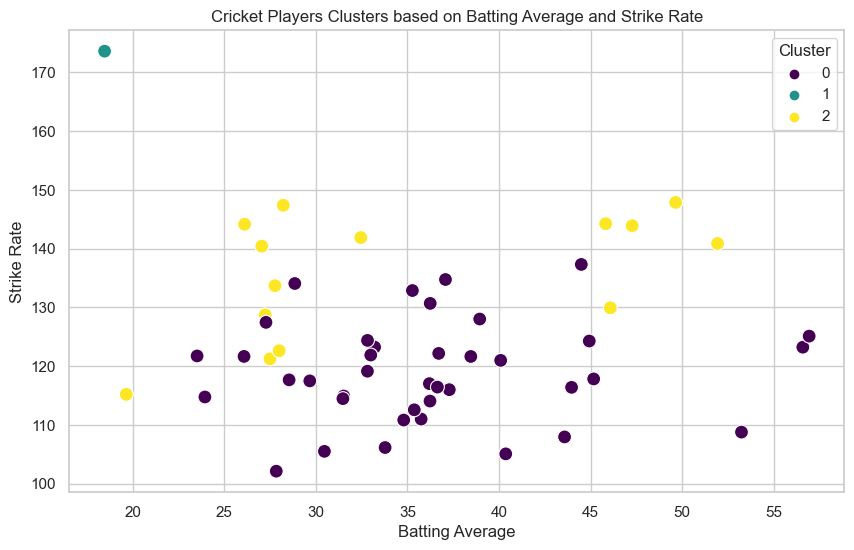

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [237]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
# Normalize the data
scaler = MinMaxScaler()
sorted_data.reset_index(drop=True, inplace=True)
filtered_sorted_batting_powerplay_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_batting_powerplay_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.5
strike_rate_weight = 0.6

# Create a new column for the composite score
filtered_sorted_batting_powerplay_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_powerplay_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)


print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

print(f"Test Loss: {loss:.4f}")
print(f"Test MSE: {accuracy:.4f}")

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 0.6941 - mse: 0.0364
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6927 - mse: 0.0357
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6916 - mse: 0.0352
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6906 - mse: 0.0347
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6896 - mse: 0.0341
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6885 - mse: 0.0336
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6874 - mse: 0.0331
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6865 - mse: 0.0326
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6858 - mse: 0.0323
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6850 - mse: 0.0319
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6844 

2/2 [==============================] - 0s 2ms/step


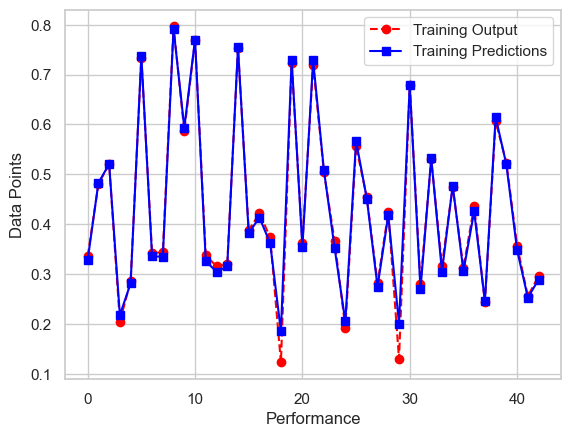

In [238]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_train), label='Training Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_train)), label='Training Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

1/1 [==============================] - 0s 18ms/step


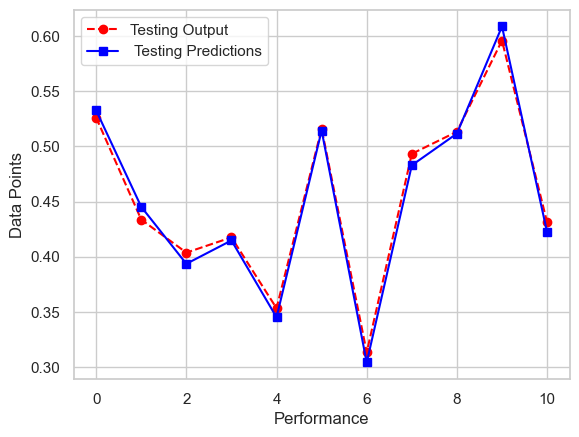

In [239]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_test), label='Testing Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_test)), label=' Testing Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

2/2 [==============================] - 0s 2ms/step


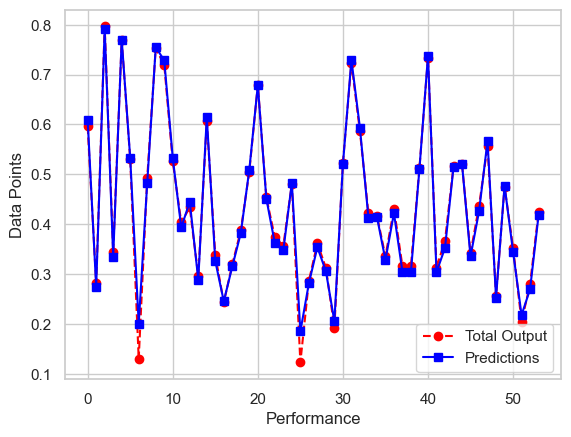

In [240]:
import matplotlib.pyplot as plt
plt.plot(np.array(y), label='Total Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X)), label='Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

In [241]:
predictions

array([[0.53260493],
       [0.44514436],
       [0.39347348],
       [0.4146808 ],
       [0.34495002],
       [0.5143598 ],
       [0.3039964 ],
       [0.48284644],
       [0.51163095],
       [0.60880333],
       [0.4222611 ]], dtype=float32)

In [242]:
len(predictions)

11

In [243]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 2ms/step
[[0.60880333]
 [0.27478036]
 [0.79183596]
 [0.3350607 ]
 [0.77032524]
 [0.53292835]
 [0.20075764]
 [0.48284644]
 [0.7547997 ]
 [0.7285489 ]
 [0.53260493]
 [0.39347348]
 [0.44514436]
 [0.28903234]
 [0.6147781 ]
 [0.32620057]
 [0.24552375]
 [0.31530234]
 [0.38228732]
 [0.50918853]
 [0.6788818 ]
 [0.4512837 ]
 [0.3618725 ]
 [0.34823918]
 [0.48285058]
 [0.18498099]
 [0.28154022]
 [0.3539344 ]
 [0.30575156]
 [0.2052461 ]
 [0.51981944]
 [0.7296293 ]
 [0.5934455 ]
 [0.41335246]
 [0.4146808 ]
 [0.32830593]
 [0.4222611 ]
 [0.30456898]
 [0.30511945]
 [0.51163095]
 [0.73779213]
 [0.3039964 ]
 [0.3524092 ]
 [0.5143598 ]
 [0.5206829 ]
 [0.33539656]
 [0.42558143]
 [0.5669811 ]
 [0.25289047]
 [0.47763735]
 [0.34495002]
 [0.21796915]
 [0.26969108]
 [0.41809598]]


In [244]:
len(output_players_performance)

54

In [245]:
filtered_sorted_batting_powerplay_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance
0,ML Hayden,599,461,13,46.076923,129.934924,0.540902,0.200334,2,0.595999
1,DPMD Jayawardene,605,499,22,27.500000,121.242485,0.614876,0.119008,2,0.281755
2,JM Bairstow,695,470,14,49.642857,147.872340,0.506475,0.258993,2,0.796487
3,M Vohra,681,529,25,27.240000,128.733459,0.422907,0.237885,2,0.344091
4,SA Yadav,727,516,14,51.928571,140.891473,0.577717,0.181568,2,0.768834
5,PP Shaw,1129,766,40,28.225000,147.389034,0.549159,0.186005,2,0.530297
6,Mandeep Singh,629,546,32,19.656250,115.201465,0.597774,0.076312,2,0.129986
7,V Sehwag,1593,1105,61,26.114754,144.162896,0.577527,0.173258,2,0.493253
8,JC Buttler,1229,854,26,47.269231,143.911007,0.510985,0.268511,2,0.752485
9,CA Lynn,779,540,17,45.823529,144.259259,0.508344,0.284981,2,0.719674


# Best Batters In the Powerplay

In [246]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Predicted Performance'])

# Concatenate the two dataframes along the column axis
merged_batting_powerplay_df = pd.concat([filtered_sorted_batting_powerplay_df, performance_df], axis=1)
merged_batting_powerplay_df = merged_batting_powerplay_df.sort_values('Predicted Performance', ascending=False)
merged_batting_powerplay_df = merged_batting_powerplay_df.reset_index(drop=True)
merged_batting_powerplay_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Predicted Performance
0,JM Bairstow,695,470,14,49.642857,147.872340,0.506475,0.258993,2,0.796487,0.791836
1,SA Yadav,727,516,14,51.928571,140.891473,0.577717,0.181568,2,0.768834,0.770325
2,JC Buttler,1229,854,26,47.269231,143.911007,0.510985,0.268511,2,0.752485,0.754800
3,KL Rahul,1594,1274,28,56.928571,125.117739,0.431619,0.233375,0,0.734117,0.737792
4,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647,0,0.723681,0.729629
5,CA Lynn,779,540,17,45.823529,144.259259,0.508344,0.284981,2,0.719674,0.728549
6,Ishan Kishan,679,551,12,56.583333,123.230490,0.518409,0.194404,0,0.679355,0.678882
7,SP Narine,665,383,36,18.472222,173.629243,0.517293,0.342857,1,0.606210,0.614778
8,ML Hayden,599,461,13,46.076923,129.934924,0.540902,0.200334,2,0.595999,0.608803
9,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568,0,0.586194,0.593445


# Batting Middle Overs Part 1

In [247]:
batting_middle_one = []
for i in unique_batters:
    batting_middle_one.append(batting_stats_overs(i, get_batting_stats(i), 6, 10))

C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:15: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:16: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (runs_score/balls_faced)*100
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:1

In [248]:
batting_stats_overs("AB de Villiers", get_batting_stats("AB de Villiers") , 6, 10)

['AB de Villiers',
 1295,
 1067,
 34,
 38.088235294117645,
 121.36832239925025,
 0.27181467181467184,
 0.17606177606177606]

In [249]:
batting_middle_one

[['YBK Jaiswal',
  134,
  97,
  6,
  22.333333333333332,
  138.1443298969072,
  0.26865671641791045,
  0.31343283582089554],
 ['JC Buttler',
  658,
  493,
  14,
  47.0,
  133.46855983772818,
  0.3100303951367781,
  0.20972644376899696],
 ['SV Samson',
  1209,
  901,
  34,
  35.55882352941177,
  134.18423973362928,
  0.23159636062861869,
  0.28287841191067],
 ['D Padikkal',
  334,
  280,
  8,
  41.75,
  119.28571428571428,
  0.2874251497005988,
  0.2155688622754491],
 ['SO Hetmyer',
  49,
  47,
  3,
  16.333333333333332,
  104.25531914893618,
  0.08163265306122448,
  0.3673469387755102],
 ['R Ashwin', 33, 39, 1, 33.0, 84.61538461538461, 0.12121212121212122, 0.0],
 ['R Parag',
  71,
  78,
  2,
  35.5,
  91.02564102564102,
  0.39436619718309857,
  0.08450704225352113],
 ['TA Boult', 0, 0, 0, nan, nan, nan, nan],
 ['OC McCoy', 0, 0, 0, nan, nan, nan, nan],
 ['WP Saha',
  428,
  460,
  20,
  21.4,
  93.04347826086956,
  0.2803738317757009,
  0.04205607476635514],
 ['Shubman Gill',
  479,
  

In [250]:
batting_middle_one_df = pd.DataFrame(batting_middle_one, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage'])
batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,YBK Jaiswal,134,97,6,22.333333,138.144330,0.268657,0.313433
1,JC Buttler,658,493,14,47.000000,133.468560,0.310030,0.209726
2,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878
3,D Padikkal,334,280,8,41.750000,119.285714,0.287425,0.215569
4,SO Hetmyer,49,47,3,16.333333,104.255319,0.081633,0.367347
...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,0,0,0,NaN,NaN,NaN,NaN
601,MA Khote,0,0,0,NaN,NaN,NaN,NaN
602,SB Joshi,0,0,0,NaN,NaN,NaN,NaN
603,DS Lehmann,14,13,1,14.000000,107.692308,0.571429,0.000000


In [251]:
sorted_batting_middle_one_df = batting_middle_one_df.sort_values('runs', ascending=False)
filtered_sorted_batting_middle_one_df = sorted_batting_middle_one_df.query('runs >= 500').dropna()
print(len(filtered_sorted_batting_middle_one_df))
filtered_sorted_batting_middle_one_df = filtered_sorted_batting_middle_one_df.reset_index(drop=True)

45


In [252]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = filtered_sorted_batting_middle_one_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
X = torch.tensor(X, dtype=torch.float32)

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5

class Autoencoder(nn.Module):
    def __init__(self, input_shape, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Tanh()  # Use Tanh activation for output layer as it's similar to Linear activation in Keras
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_shape, encoding_dim)
encoder = autoencoder.encoder

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Create a DataLoader for efficient data loading
batch_size = 32
data_loader = DataLoader(torch.utils.data.TensorDataset(X), batch_size=batch_size, shuffle=True)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        inputs = data[0]  # Access input data only
        optimizer.zero_grad()

        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

# Encode the data using the trained encoder
encoded_data = encoder(X).detach().numpy()

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Convert encoded_data and labels to DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=[f'Feature_{i+1}' for i in range(encoding_dim)])
labels_df = pd.DataFrame(labels, columns=['Cluster'])


Epoch 1, Loss: 0.9522900879383087
Epoch 2, Loss: 1.0036857724189758
Epoch 3, Loss: 1.0254113972187042
Epoch 4, Loss: 1.031048744916916
Epoch 5, Loss: 0.963087648153305
Epoch 6, Loss: 0.9875517189502716
Epoch 7, Loss: 0.9857913255691528
Epoch 8, Loss: 0.9307275712490082
Epoch 9, Loss: 0.9466913044452667
Epoch 10, Loss: 0.8896050453186035
Epoch 11, Loss: 1.0042556524276733
Epoch 12, Loss: 0.8853379786014557
Epoch 13, Loss: 0.9446898698806763
Epoch 14, Loss: 0.9129126965999603
Epoch 15, Loss: 0.8487613201141357
Epoch 16, Loss: 0.9642190635204315
Epoch 17, Loss: 0.8927928507328033
Epoch 18, Loss: 0.8535587787628174
Epoch 19, Loss: 1.0011504590511322
Epoch 20, Loss: 0.8846484422683716
Epoch 21, Loss: 0.8718215823173523
Epoch 22, Loss: 0.8173315227031708
Epoch 23, Loss: 0.8759361803531647
Epoch 24, Loss: 0.8424329459667206
Epoch 25, Loss: 0.8567847907543182
Epoch 26, Loss: 1.0211029946804047
Epoch 27, Loss: 0.8382565379142761
Epoch 28, Loss: 0.869679868221283
Epoch 29, Loss: 0.87531802058219

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [253]:
filtered_sorted_batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,V Kohli,1801,1583,36,50.027778,113.771320,0.286507,0.149917
1,SK Raina,1786,1460,48,37.208333,122.328767,0.320269,0.174692
2,S Dhawan,1624,1351,43,37.767442,120.207254,0.349754,0.103448
3,DA Warner,1546,1163,33,46.848485,132.932072,0.245796,0.252264
4,RV Uthappa,1462,1214,55,26.581818,120.428336,0.309166,0.217510
5,RG Sharma,1420,1336,54,26.296296,106.287425,0.273239,0.160563
6,AB de Villiers,1295,1067,34,38.088235,121.368322,0.271815,0.176062
7,CH Gayle,1221,859,31,39.387097,142.142026,0.190008,0.476658
8,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878
9,SR Watson,1158,800,36,32.166667,144.750000,0.324698,0.321244


In [254]:
combined_data = pd.concat([filtered_sorted_batting_middle_one_df, labels_df], axis=1)
combined_data.head(5)

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,V Kohli,1801,1583,36,50.027778,113.771320,0.286507,0.149917,1
1,SK Raina,1786,1460,48,37.208333,122.328767,0.320269,0.174692,1
2,S Dhawan,1624,1351,43,37.767442,120.207254,0.349754,0.103448,1
3,DA Warner,1546,1163,33,46.848485,132.932072,0.245796,0.252264,1
4,RV Uthappa,1462,1214,55,26.581818,120.428336,0.309166,0.217510,2


In [255]:
# Assuming 'data' is your DataFrame
sorted_data = combined_data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
11,MK Pandey,1127,1013,33,34.151515,111.253702,0.209406,0.202307,2
9,SR Watson,1158,800,36,32.166667,144.750000,0.324698,0.321244,2
24,V Sehwag,749,449,20,37.450000,166.815145,0.357810,0.296395,2
18,SE Marsh,856,604,14,61.142857,141.721854,0.406542,0.189252,2
17,RR Pant,913,678,15,60.866667,134.660767,0.324206,0.230011,2
40,KS Williamson,569,522,11,51.727273,109.003831,0.281195,0.147627,2
14,KL Rahul,989,781,25,39.560000,126.632522,0.250758,0.218402,2
10,AT Rayudu,1135,1037,30,37.833333,109.450338,0.303084,0.132159,2
36,MS Dhoni,608,667,13,46.769231,91.154423,0.276316,0.148026,2
8,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878,2


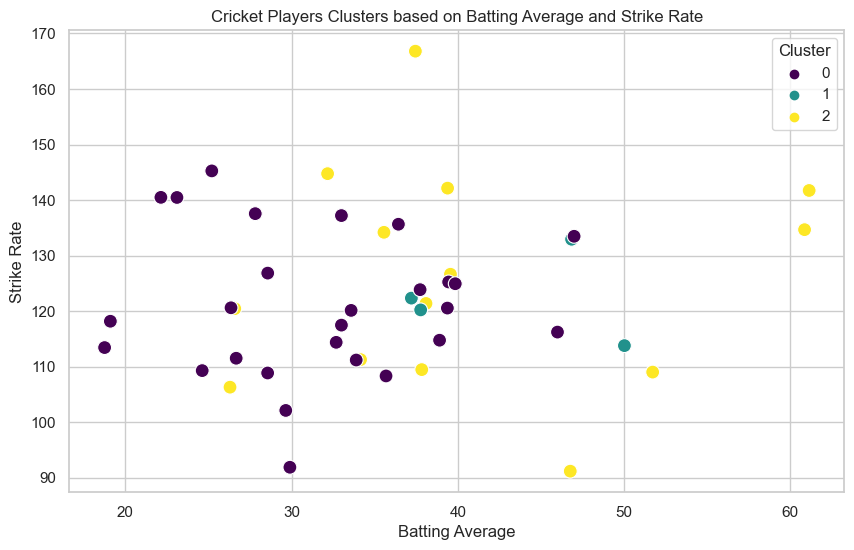

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [257]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_middle_one_df = filtered_sorted_batting_middle_one_df.reset_index(drop=True)
len(filtered_sorted_batting_middle_one_df)

45

In [258]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data.reset_index(drop=True, inplace=True)
filtered_sorted_batting_middle_one_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_batting_middle_one_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.5
strike_rate_weight = 0.6

# Create a new column for the composite score
filtered_sorted_batting_middle_one_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_middle_one_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)


print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

print(f"Test Loss: {loss:.4f}")
print(f"Test MSE: {accuracy:.4f}")

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 

2/2 [==============================] - 0s 3ms/step


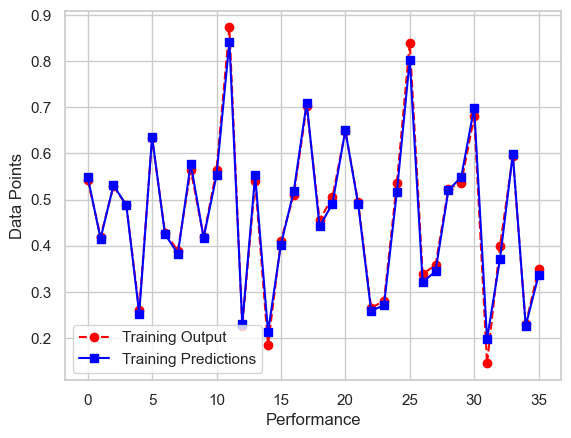

In [259]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_train), label='Training Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_train)), label='Training Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

1/1 [==============================] - 0s 17ms/step


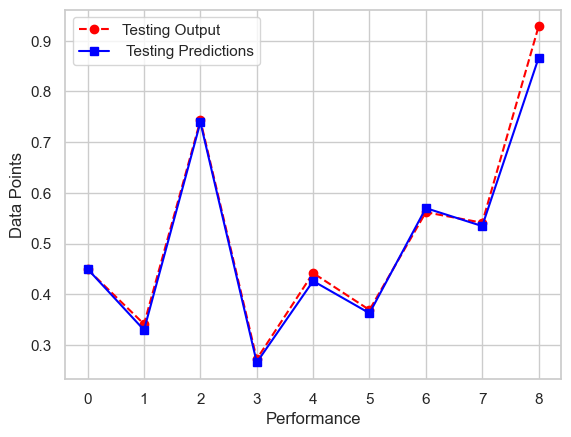

In [260]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_test), label='Testing Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_test)), label=' Testing Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

2/2 [==============================] - 0s 3ms/step


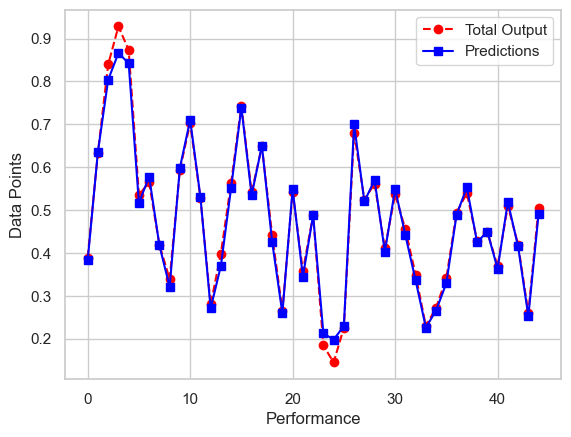

In [261]:
import matplotlib.pyplot as plt
plt.plot(np.array(y), label='Total Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X)), label='Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

In [262]:
predictions

array([[0.44968328],
       [0.32950726],
       [0.7390716 ],
       [0.26551217],
       [0.42609972],
       [0.36265683],
       [0.56987125],
       [0.53444177],
       [0.8659588 ]], dtype=float32)

In [263]:
len(predictions)

9

In [264]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 1ms/step
[[0.3821834 ]
 [0.6360936 ]
 [0.80366373]
 [0.8659588 ]
 [0.8423646 ]
 [0.51639247]
 [0.57792914]
 [0.41721198]
 [0.3205803 ]
 [0.5985197 ]
 [0.70999867]
 [0.53084785]
 [0.27033988]
 [0.37006605]
 [0.552226  ]
 [0.7390716 ]
 [0.53444177]
 [0.6500766 ]
 [0.42609972]
 [0.258821  ]
 [0.5494506 ]
 [0.3443905 ]
 [0.48787585]
 [0.21243775]
 [0.1973901 ]
 [0.22953756]
 [0.69956225]
 [0.51983696]
 [0.56987125]
 [0.40214232]
 [0.5490651 ]
 [0.4415032 ]
 [0.33598167]
 [0.22584912]
 [0.26551217]
 [0.32950726]
 [0.48928413]
 [0.5526665 ]
 [0.4249041 ]
 [0.44968328]
 [0.36265683]
 [0.518541  ]
 [0.41513973]
 [0.25230482]
 [0.4910161 ]]


In [265]:
len(output_players_performance)

45

In [266]:
filtered_sorted_batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance
0,MK Pandey,1127,1013,33,34.151515,111.253702,0.209406,0.202307,2,0.389076
1,SR Watson,1158,800,36,32.166667,144.750000,0.324698,0.321244,2,0.633686
2,V Sehwag,749,449,20,37.450000,166.815145,0.357810,0.296395,2,0.839446
3,SE Marsh,856,604,14,61.142857,141.721854,0.406542,0.189252,2,0.928146
4,RR Pant,913,678,15,60.866667,134.660767,0.324206,0.230011,2,0.873288
5,KS Williamson,569,522,11,51.727273,109.003831,0.281195,0.147627,2,0.535508
6,KL Rahul,989,781,25,39.560000,126.632522,0.250758,0.218402,2,0.564183
7,AT Rayudu,1135,1037,30,37.833333,109.450338,0.303084,0.132159,2,0.418817
8,MS Dhoni,608,667,13,46.769231,91.154423,0.276316,0.148026,2,0.338490
9,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878,2,0.593839


# Best Batters In the Middle Part 1

In [267]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_batting_middle_one_df = pd.concat([filtered_sorted_batting_middle_one_df, performance_df], axis=1)
merged_filtered_sorted_batting_middle_one_df = merged_filtered_sorted_batting_middle_one_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_batting_middle_one_df = merged_filtered_sorted_batting_middle_one_df.reset_index(drop=True)
merged_filtered_sorted_batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Actual Performance
0,SE Marsh,856,604,14,61.142857,141.721854,0.406542,0.189252,2,0.928146,0.865959
1,RR Pant,913,678,15,60.866667,134.660767,0.324206,0.230011,2,0.873288,0.842365
2,V Sehwag,749,449,20,37.450000,166.815145,0.357810,0.296395,2,0.839446,0.803664
3,DA Warner,1546,1163,33,46.848485,132.932072,0.245796,0.252264,1,0.743048,0.739072
4,CH Gayle,1221,859,31,39.387097,142.142026,0.190008,0.476658,2,0.703023,0.709999
5,JC Buttler,658,493,14,47.000000,133.468560,0.310030,0.209726,0,0.680623,0.699562
6,V Kohli,1801,1583,36,50.027778,113.771320,0.286507,0.149917,1,0.648259,0.650077
7,SR Watson,1158,800,36,32.166667,144.750000,0.324698,0.321244,2,0.633686,0.636094
8,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878,2,0.593839,0.598520
9,KL Rahul,989,781,25,39.560000,126.632522,0.250758,0.218402,2,0.564183,0.577929


# Batting Middle Overs Part 2

In [268]:
batting_middle_two = []
for i in unique_batters:
    batting_middle_two.append(batting_stats_overs(i, get_batting_stats(i), 11, 15))

C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:15: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:16: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (runs_score/balls_faced)*100
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:15: RuntimeWarning: divide by zero encou

In [269]:
batting_middle_two

[['YBK Jaiswal',
  47,
  37,
  5,
  9.4,
  127.02702702702702,
  0.425531914893617,
  0.1276595744680851],
 ['JC Buttler',
  616,
  381,
  19,
  32.421052631578945,
  161.67979002624674,
  0.2922077922077922,
  0.33116883116883117],
 ['SV Samson',
  880,
  621,
  29,
  30.344827586206897,
  141.70692431561997,
  0.2636363636363636,
  0.26590909090909093],
 ['D Padikkal',
  265,
  193,
  11,
  24.09090909090909,
  137.30569948186528,
  0.3471698113207547,
  0.2490566037735849],
 ['SO Hetmyer',
  298,
  232,
  8,
  37.25,
  128.44827586206898,
  0.3087248322147651,
  0.24161073825503357],
 ['R Ashwin',
  175,
  167,
  9,
  19.444444444444443,
  104.79041916167664,
  0.2057142857142857,
  0.2057142857142857],
 ['R Parag',
  196,
  165,
  7,
  28.0,
  118.7878787878788,
  0.2857142857142857,
  0.21428571428571427],
 ['TA Boult', 2, 6, 1, 2.0, 33.33333333333333, 0.0, 0.0],
 ['OC McCoy', 0, 0, 0, nan, nan, nan, nan],
 ['WP Saha',
  586,
  430,
  17,
  34.470588235294116,
  136.27906976744185

In [270]:
batting_middle_two_df = pd.DataFrame(batting_middle_two, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage'])
batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,YBK Jaiswal,47,37,5,9.400000,127.027027,0.425532,0.127660
1,JC Buttler,616,381,19,32.421053,161.679790,0.292208,0.331169
2,SV Samson,880,621,29,30.344828,141.706924,0.263636,0.265909
3,D Padikkal,265,193,11,24.090909,137.305699,0.347170,0.249057
4,SO Hetmyer,298,232,8,37.250000,128.448276,0.308725,0.241611
...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,0,0,0,NaN,NaN,NaN,NaN
601,MA Khote,12,9,1,12.000000,133.333333,0.000000,0.500000
602,SB Joshi,6,14,2,3.000000,42.857143,0.000000,0.000000
603,DS Lehmann,0,2,1,0.000000,0.000000,NaN,NaN


In [271]:
sorted_batting_middle_two_df = batting_middle_two_df.sort_values('runs', ascending=False)
filtered_sorted_batting_middle_two_df = sorted_batting_middle_two_df.query('runs >= 500').dropna()
print(len(filtered_sorted_batting_middle_two_df))
filtered_sorted_batting_middle_two_df

43


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
70,MS Dhoni,1781,1591,39,45.666667,111.942175,0.222347,0.208871
176,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863
14,V Kohli,1707,1230,51,33.470588,138.780488,0.260105,0.235501
59,RG Sharma,1682,1220,37,45.459459,137.868852,0.342449,0.221165
19,KD Karthik,1590,1188,53,30.000000,133.838384,0.349686,0.166038
179,SK Raina,1526,1026,54,28.259259,148.732943,0.290957,0.263434
69,AT Rayudu,1467,1047,48,30.562500,140.114613,0.289025,0.298569
116,KA Pollard,1366,1033,34,40.176471,132.236205,0.240117,0.360176
262,Yuvraj Singh,1278,931,43,29.720930,137.271751,0.294210,0.328638
241,YK Pathan,1206,847,44,27.409091,142.384888,0.262023,0.348259


In [272]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_middle_two_df = filtered_sorted_batting_middle_two_df.reset_index(drop=True)
len(filtered_sorted_batting_middle_two_df)

43

In [273]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = filtered_sorted_batting_middle_two_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
X = torch.tensor(X, dtype=torch.float32)

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5

class Autoencoder(nn.Module):
    def __init__(self, input_shape, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Tanh()  # Use Tanh activation for output layer as it's similar to Linear activation in Keras
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_shape, encoding_dim)
encoder = autoencoder.encoder

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Create a DataLoader for efficient data loading
batch_size = 32
data_loader = DataLoader(torch.utils.data.TensorDataset(X), batch_size=batch_size, shuffle=True)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        inputs = data[0]  # Access input data only
        optimizer.zero_grad()

        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

# Encode the data using the trained encoder
encoded_data = encoder(X).detach().numpy()

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Convert encoded_data and labels to DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=[f'Feature_{i+1}' for i in range(encoding_dim)])
labels_df = pd.DataFrame(labels, columns=['Cluster'])


Epoch 1, Loss: 0.9231870174407959
Epoch 2, Loss: 1.0593226850032806
Epoch 3, Loss: 1.1392609775066376
Epoch 4, Loss: 0.9519643783569336
Epoch 5, Loss: 0.9203078150749207
Epoch 6, Loss: 0.9360279440879822
Epoch 7, Loss: 1.002222865819931
Epoch 8, Loss: 1.088195264339447
Epoch 9, Loss: 0.8701023459434509
Epoch 10, Loss: 0.7892150729894638
Epoch 11, Loss: 1.039509117603302
Epoch 12, Loss: 0.8838241398334503
Epoch 13, Loss: 0.9762766361236572
Epoch 14, Loss: 1.143469512462616
Epoch 15, Loss: 0.9457553625106812
Epoch 16, Loss: 0.9322805404663086
Epoch 17, Loss: 0.8864412903785706
Epoch 18, Loss: 0.9642879366874695
Epoch 19, Loss: 0.8521192371845245
Epoch 20, Loss: 0.856867253780365
Epoch 21, Loss: 0.8297536969184875
Epoch 22, Loss: 1.007375717163086
Epoch 23, Loss: 0.7746809422969818
Epoch 24, Loss: 0.9164441227912903
Epoch 25, Loss: 0.8897788226604462
Epoch 26, Loss: 0.933245986700058
Epoch 27, Loss: 0.8686686754226685
Epoch 28, Loss: 0.9183790385723114
Epoch 29, Loss: 0.8163969218730927
E

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [274]:
filtered_sorted_batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,MS Dhoni,1781,1591,39,45.666667,111.942175,0.222347,0.208871
1,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863
2,V Kohli,1707,1230,51,33.470588,138.780488,0.260105,0.235501
3,RG Sharma,1682,1220,37,45.459459,137.868852,0.342449,0.221165
4,KD Karthik,1590,1188,53,30.000000,133.838384,0.349686,0.166038
5,SK Raina,1526,1026,54,28.259259,148.732943,0.290957,0.263434
6,AT Rayudu,1467,1047,48,30.562500,140.114613,0.289025,0.298569
7,KA Pollard,1366,1033,34,40.176471,132.236205,0.240117,0.360176
8,Yuvraj Singh,1278,931,43,29.720930,137.271751,0.294210,0.328638
9,YK Pathan,1206,847,44,27.409091,142.384888,0.262023,0.348259


In [275]:
combined_data = pd.concat([filtered_sorted_batting_middle_two_df, labels_df], axis=1)
combined_data.head(5)

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,MS Dhoni,1781,1591,39,45.666667,111.942175,0.222347,0.208871,1
1,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863,0
2,V Kohli,1707,1230,51,33.470588,138.780488,0.260105,0.235501,1
3,RG Sharma,1682,1220,37,45.459459,137.868852,0.342449,0.221165,0
4,KD Karthik,1590,1188,53,30.000000,133.838384,0.349686,0.166038,1


In [276]:
# Assuming 'data' is your DataFrame
sorted_data = combined_data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
16,CH Gayle,967,517,18,53.722222,187.040619,0.231644,0.508790,2
23,KL Rahul,754,517,12,62.833333,145.841393,0.228117,0.286472,2
0,MS Dhoni,1781,1591,39,45.666667,111.942175,0.222347,0.208871,1
41,DJ Hussey,529,414,25,21.160000,127.777778,0.226843,0.294896,1
38,SS Tiwary,563,448,24,23.458333,125.669643,0.241563,0.245115,1
37,KH Pandya,569,425,28,20.321429,133.882353,0.323374,0.242531,1
36,HH Pandya,574,442,17,33.764706,129.864253,0.292683,0.250871,1
35,DJ Hooda,580,409,29,20.000000,141.809291,0.200000,0.320690,1
30,SA Yadav,692,514,30,23.066667,134.630350,0.381503,0.173410,1
29,SS Iyer,693,495,31,22.354839,140.000000,0.265512,0.277056,1


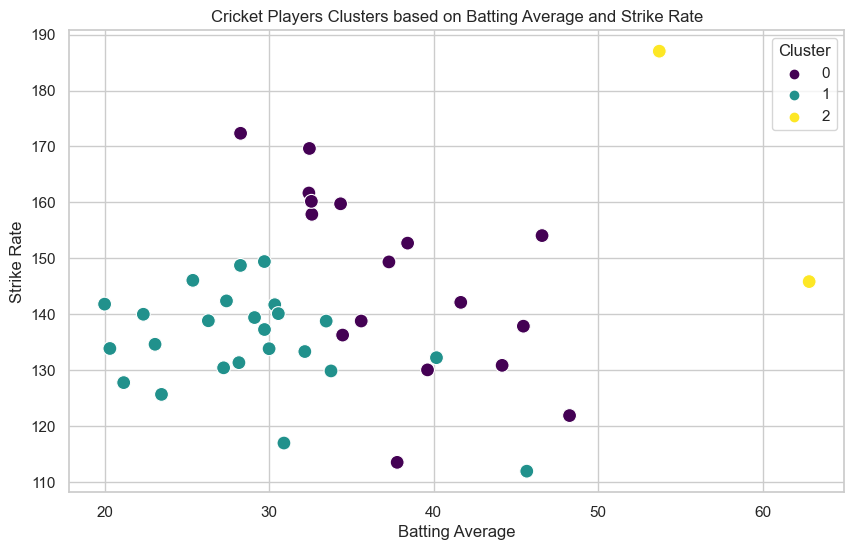

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [278]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data.reset_index(drop=True, inplace=True)
filtered_sorted_batting_middle_two_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_batting_middle_two_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.5
strike_rate_weight = 0.7

# Create a new column for the composite score
filtered_sorted_batting_middle_two_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_middle_two_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)


print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

print(f"Test Loss: {loss:.4f}")
print(f"Test MSE: {accuracy:.4f}")

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 0.7040 - mse: 0.0468
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6999 - mse: 0.0448
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6965 - mse: 0.0431
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6946 - mse: 0.0422
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6928 - mse: 0.0413
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6920 - mse: 0.0409
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6910 - mse: 0.0404
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6902 - mse: 0.0400
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6896 - mse: 0.0397
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6890 - mse: 0.0394
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6885 

2/2 [==============================] - 0s 1ms/step


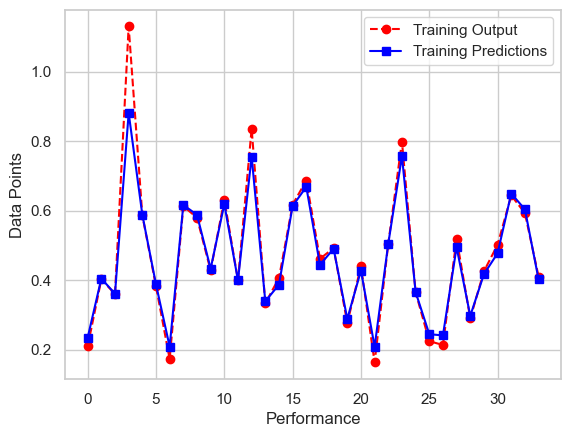

In [279]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_train), label='Training Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_train)), label='Training Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

1/1 [==============================] - 0s 17ms/step


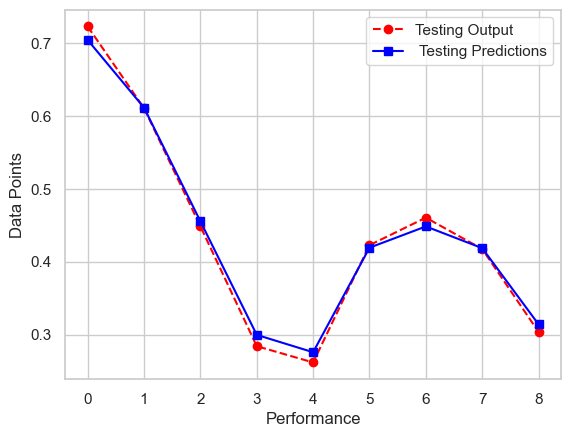

In [280]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_test), label='Testing Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_test)), label=' Testing Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

2/2 [==============================] - 0s 2ms/step


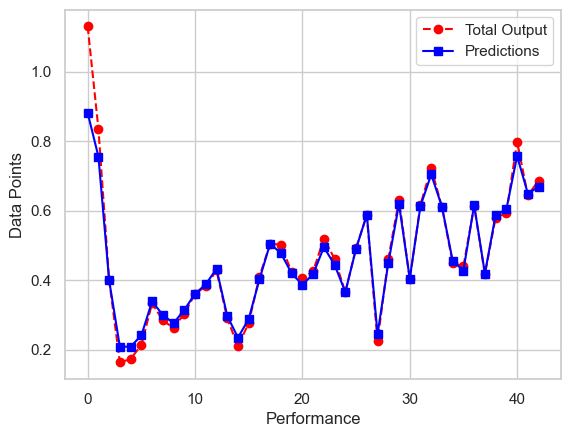

In [281]:
import matplotlib.pyplot as plt
plt.plot(np.array(y), label='Total Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X)), label='Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

In [282]:
predictions

array([[0.70382744],
       [0.61101496],
       [0.45525968],
       [0.29958448],
       [0.2758033 ],
       [0.41910535],
       [0.44823635],
       [0.41849875],
       [0.31401524]], dtype=float32)

In [283]:
len(predictions)

9

In [284]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 2ms/step
[[0.8807963 ]
 [0.75548977]
 [0.39910397]
 [0.2079113 ]
 [0.20834513]
 [0.24064334]
 [0.33857197]
 [0.29958448]
 [0.2758033 ]
 [0.3140152 ]
 [0.36067784]
 [0.38747308]
 [0.4326933 ]
 [0.296825  ]
 [0.23428592]
 [0.2881011 ]
 [0.40193582]
 [0.50489175]
 [0.47716448]
 [0.41910535]
 [0.38685957]
 [0.41687796]
 [0.49465987]
 [0.4437682 ]
 [0.36547875]
 [0.490215  ]
 [0.58800316]
 [0.24420518]
 [0.44823635]
 [0.61843884]
 [0.4042614 ]
 [0.6132619 ]
 [0.70382744]
 [0.61101496]
 [0.45525968]
 [0.42737803]
 [0.6160949 ]
 [0.41849875]
 [0.5877576 ]
 [0.60344803]
 [0.75674206]
 [0.6490043 ]
 [0.6681384 ]]


In [285]:
len(output_players_performance)

43

In [286]:
filtered_sorted_batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance
0,CH Gayle,967,517,18,53.722222,187.040619,0.231644,0.508790,2,1.129751
1,KL Rahul,754,517,12,62.833333,145.841393,0.228117,0.286472,2,0.835366
2,MS Dhoni,1781,1591,39,45.666667,111.942175,0.222347,0.208871,1,0.399611
3,DJ Hussey,529,414,25,21.160000,127.777778,0.226843,0.294896,1,0.162873
4,SS Tiwary,563,448,24,23.458333,125.669643,0.241563,0.245115,1,0.172720
5,KH Pandya,569,425,28,20.321429,133.882353,0.323374,0.242531,1,0.213125
6,HH Pandya,574,442,17,33.764706,129.864253,0.292683,0.250871,1,0.332990
7,DJ Hooda,580,409,29,20.000000,141.809291,0.200000,0.320690,1,0.284124
8,SA Yadav,692,514,30,23.066667,134.630350,0.381503,0.173410,1,0.261798
9,SS Iyer,693,495,31,22.354839,140.000000,0.265512,0.277056,1,0.303618


# Best Batters In the Middle Part 2

In [287]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_batting_middle_two_df = pd.concat([filtered_sorted_batting_middle_two_df, performance_df], axis=1)
merged_filtered_sorted_batting_middle_two_df = merged_filtered_sorted_batting_middle_two_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_batting_middle_two_df = merged_filtered_sorted_batting_middle_two_df.reset_index(drop=True)
merged_filtered_sorted_batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Actual Performance
0,CH Gayle,967,517,18,53.722222,187.040619,0.231644,0.508790,2,1.129751,0.880796
1,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863,0,0.798610,0.756742
2,KL Rahul,754,517,12,62.833333,145.841393,0.228117,0.286472,2,0.835366,0.755490
3,SR Watson,1006,593,31,32.451613,169.645868,0.349901,0.339960,0,0.722379,0.703827
4,GJ Maxwell,848,492,30,28.266667,172.357724,0.287736,0.424528,0,0.686403,0.668138
5,AD Russell,893,559,26,34.346154,159.749553,0.241881,0.510638,0,0.643380,0.649004
6,RG Sharma,1682,1220,37,45.459459,137.868852,0.342449,0.221165,0,0.631086,0.618439
7,KS Williamson,730,478,19,38.421053,152.719665,0.257534,0.279452,0,0.612627,0.616095
8,JC Buttler,616,381,19,32.421053,161.679790,0.292208,0.331169,0,0.617158,0.613262
9,SE Marsh,684,427,21,32.571429,160.187354,0.327485,0.289474,0,0.610340,0.611015


# Batting Death Overs

In [288]:
batting_death = []
for i in unique_batters:
    batting_death.append(batting_stats_overs(i, get_batting_stats(i), 16, 19))

C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:15: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:16: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (runs_score/balls_faced)*100
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_13020\3886220328.py:1

In [289]:
batting_death

[['YBK Jaiswal', 0, 0, 0, nan, nan, nan, nan],
 ['JC Buttler',
  328,
  163,
  12,
  27.333333333333332,
  201.22699386503066,
  0.3048780487804878,
  0.42073170731707316],
 ['SV Samson',
  438,
  227,
  23,
  19.043478260869566,
  192.95154185022025,
  0.273972602739726,
  0.4383561643835616],
 ['D Padikkal',
  30,
  28,
  7,
  4.285714285714286,
  107.14285714285714,
  0.5333333333333333,
  0.0],
 ['SO Hetmyer',
  431,
  216,
  14,
  30.785714285714285,
  199.53703703703704,
  0.23201856148491878,
  0.4872389791183295],
 ['R Ashwin',
  381,
  288,
  34,
  11.205882352941176,
  132.29166666666669,
  0.3359580052493438,
  0.2047244094488189],
 ['R Parag',
  255,
  164,
  21,
  12.142857142857142,
  155.4878048780488,
  0.2980392156862745,
  0.32941176470588235],
 ['TA Boult',
  51,
  42,
  4,
  12.75,
  121.42857142857142,
  0.1568627450980392,
  0.23529411764705882],
 ['OC McCoy', 8, 5, 1, 8.0, 160.0, 0.0, 0.75],
 ['WP Saha',
  441,
  281,
  24,
  18.375,
  156.93950177935943,
  0.299

In [290]:
batting_death_df = pd.DataFrame(batting_death, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage'])
batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,YBK Jaiswal,0,0,0,NaN,NaN,NaN,NaN
1,JC Buttler,328,163,12,27.333333,201.226994,0.304878,0.420732
2,SV Samson,438,227,23,19.043478,192.951542,0.273973,0.438356
3,D Padikkal,30,28,7,4.285714,107.142857,0.533333,0.000000
4,SO Hetmyer,431,216,14,30.785714,199.537037,0.232019,0.487239
...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,3,8,1,3.000000,37.500000,0.000000,0.000000
601,MA Khote,12,13,1,12.000000,92.307692,0.666667,0.000000
602,SB Joshi,0,0,0,NaN,NaN,NaN,NaN
603,DS Lehmann,0,0,0,NaN,NaN,NaN,NaN


In [291]:
sorted_batting_death_df = batting_death_df.sort_values('runs', ascending=False)
filtered_sorted_batting_death_df = sorted_batting_death_df.query('runs >= 300').dropna()
print(len(filtered_sorted_batting_death_df))
filtered_sorted_batting_death_df

58


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
70,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474
116,KA Pollard,1708,941,69,24.753623,181.509033,0.257611,0.446136
176,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906
19,KD Karthik,1282,695,54,23.740741,184.460432,0.377535,0.322933
135,RA Jadeja,1155,730,52,22.211538,158.219178,0.297835,0.285714
59,RG Sharma,1145,581,48,23.854167,197.074010,0.314410,0.408734
12,HH Pandya,998,538,36,27.722222,185.501859,0.284569,0.432866
14,V Kohli,991,491,38,26.078947,201.832994,0.282543,0.387487
241,YK Pathan,858,515,33,26.000000,166.601942,0.354312,0.265734
80,AD Russell,854,408,36,23.722222,209.313725,0.281030,0.540984


In [292]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_death_df = filtered_sorted_batting_death_df.reset_index(drop=True)
len(filtered_sorted_batting_death_df)

58

In [293]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = filtered_sorted_batting_death_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
X = torch.tensor(X, dtype=torch.float32)

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5

class Autoencoder(nn.Module):
    def __init__(self, input_shape, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Tanh()  # Use Tanh activation for output layer as it's similar to Linear activation in Keras
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_shape, encoding_dim)
encoder = autoencoder.encoder

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Create a DataLoader for efficient data loading
batch_size = 32
data_loader = DataLoader(torch.utils.data.TensorDataset(X), batch_size=batch_size, shuffle=True)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        inputs = data[0]  # Access input data only
        optimizer.zero_grad()

        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

# Encode the data using the trained encoder
encoded_data = encoder(X).detach().numpy()

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Convert encoded_data and labels to DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=[f'Feature_{i+1}' for i in range(encoding_dim)])
labels_df = pd.DataFrame(labels, columns=['Cluster'])


Epoch 1, Loss: 1.0450429916381836
Epoch 2, Loss: 1.0290583372116089
Epoch 3, Loss: 1.0296240746974945
Epoch 4, Loss: 1.0408389866352081
Epoch 5, Loss: 1.0095878541469574
Epoch 6, Loss: 0.9918942749500275
Epoch 7, Loss: 0.9815500378608704
Epoch 8, Loss: 1.007278174161911
Epoch 9, Loss: 0.9948420226573944
Epoch 10, Loss: 0.9918369948863983
Epoch 11, Loss: 0.9943694174289703
Epoch 12, Loss: 1.0234403610229492
Epoch 13, Loss: 1.0221213400363922
Epoch 14, Loss: 1.0046779811382294
Epoch 15, Loss: 0.9869956076145172
Epoch 16, Loss: 0.9661490321159363
Epoch 17, Loss: 0.9642453491687775
Epoch 18, Loss: 0.9481743276119232
Epoch 19, Loss: 0.984919935464859
Epoch 20, Loss: 0.9779424369335175
Epoch 21, Loss: 0.9369598925113678
Epoch 22, Loss: 0.975370854139328
Epoch 23, Loss: 0.9068134725093842
Epoch 24, Loss: 0.9356357157230377
Epoch 25, Loss: 0.9019512832164764
Epoch 26, Loss: 0.9117701351642609
Epoch 27, Loss: 0.8962967693805695
Epoch 28, Loss: 0.8622001707553864
Epoch 29, Loss: 0.86117109656333

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [294]:
filtered_sorted_batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474
1,KA Pollard,1708,941,69,24.753623,181.509033,0.257611,0.446136
2,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906
3,KD Karthik,1282,695,54,23.740741,184.460432,0.377535,0.322933
4,RA Jadeja,1155,730,52,22.211538,158.219178,0.297835,0.285714
5,RG Sharma,1145,581,48,23.854167,197.074010,0.314410,0.408734
6,HH Pandya,998,538,36,27.722222,185.501859,0.284569,0.432866
7,V Kohli,991,491,38,26.078947,201.832994,0.282543,0.387487
8,YK Pathan,858,515,33,26.000000,166.601942,0.354312,0.265734
9,AD Russell,854,408,36,23.722222,209.313725,0.281030,0.540984


In [295]:
combined_data = pd.concat([filtered_sorted_batting_death_df, labels_df], axis=1)
combined_data.head(5)

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474,0
1,KA Pollard,1708,941,69,24.753623,181.509033,0.257611,0.446136,1
2,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906,0
3,KD Karthik,1282,695,54,23.740741,184.460432,0.377535,0.322933,1
4,RA Jadeja,1155,730,52,22.211538,158.219178,0.297835,0.285714,1


In [296]:
# Assuming 'data' is your DataFrame
sorted_data = combined_data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
45,F du Plessis,366,183,17,21.529412,200.000000,0.393443,0.311475,2
9,AD Russell,854,408,36,23.722222,209.313725,0.281030,0.540984,2
33,SO Hetmyer,431,216,14,30.785714,199.537037,0.232019,0.487239,2
37,CH Gayle,404,196,12,33.666667,206.122449,0.267327,0.519802,2
39,DA Warner,399,212,14,28.500000,188.207547,0.380952,0.300752,2
22,RR Pant,534,264,25,21.360000,202.272727,0.359551,0.415730,2
21,KL Rahul,552,283,16,34.500000,195.053004,0.362319,0.326087,2
31,SV Samson,438,227,23,19.043478,192.951542,0.273973,0.438356,2
50,JC Buttler,328,163,12,27.333333,201.226994,0.304878,0.420732,2
32,S Dhawan,437,268,11,39.727273,163.059701,0.393593,0.192220,2


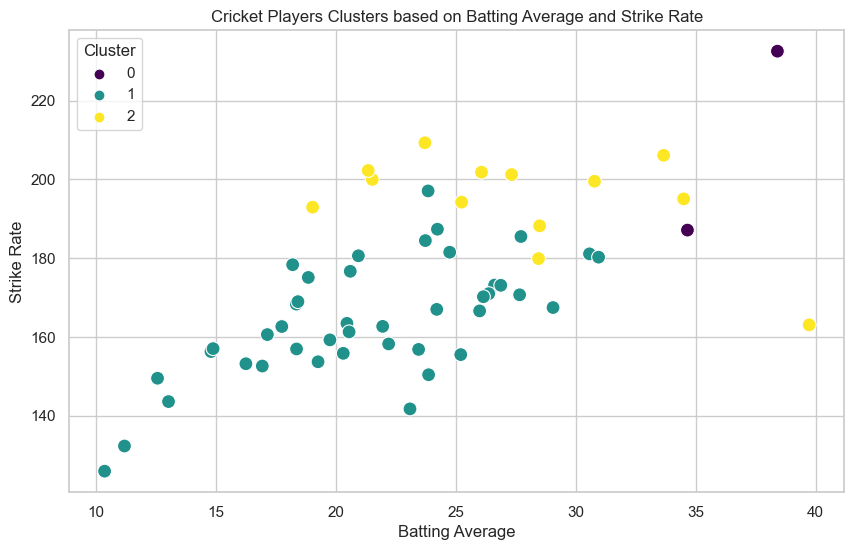

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [298]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data.reset_index(drop=True, inplace=True)
filtered_sorted_batting_death_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_batting_death_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.3
strike_rate_weight = 0.7

# Create a new column for the composite score
filtered_sorted_batting_death_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_death_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)


print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

print(f"Test Loss: {loss:.4f}")
print(f"Test MSE: {accuracy:.4f}")

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 0.6927 - mse: 0.0290
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6913 - mse: 0.0282
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6899 - mse: 0.0276
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6890 - mse: 0.0271
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6882 - mse: 0.0267
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6873 - mse: 0.0263
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6866 - mse: 0.0259
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6859 - mse: 0.0256
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6850 - mse: 0.0251
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6839 - mse: 0.0246
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6829 

2/2 [==============================] - 0s 2ms/step


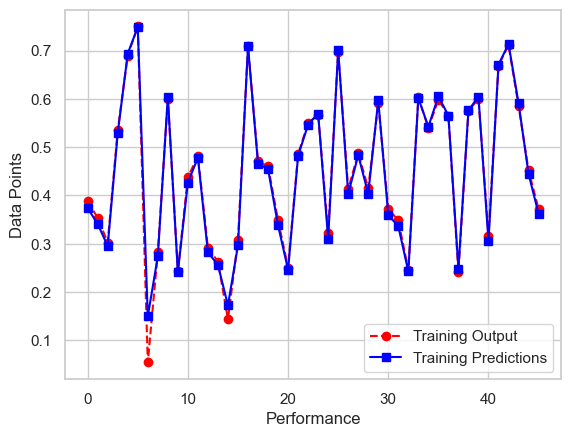

In [299]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_train), label='Training Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_train)), label='Training Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

1/1 [==============================] - 0s 59ms/step


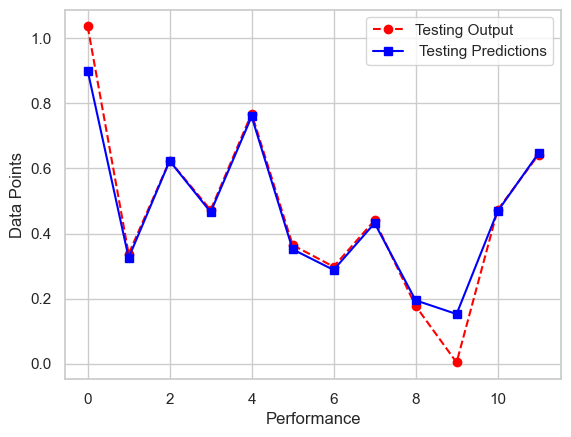

In [300]:
import matplotlib.pyplot as plt
plt.plot(np.array(y_test), label='Testing Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X_test)), label=' Testing Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

2/2 [==============================] - 0s 2ms/step


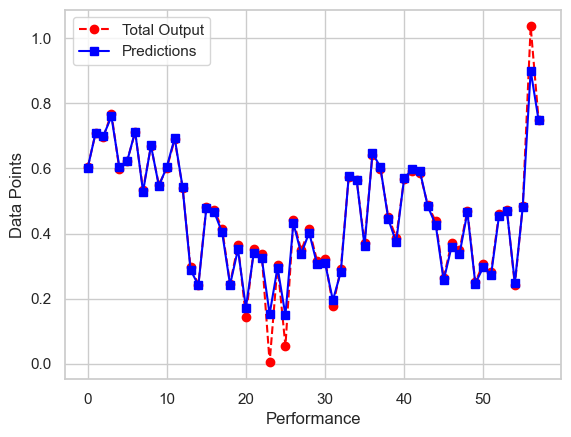

In [301]:
import matplotlib.pyplot as plt
plt.plot(np.array(y), label='Total Output',  marker='o', linestyle='--', color ="red")
plt.plot(np.array(model.predict(X)), label='Predictions',  marker='s', linestyle='-', color = "blue")
plt.xlabel('Performance')
plt.ylabel('Data Points')
plt.legend()
plt.show()

In [302]:
predictions

array([[0.90084666],
       [0.32541975],
       [0.6234069 ],
       [0.46594355],
       [0.75989425],
       [0.3514362 ],
       [0.2881599 ],
       [0.43204802],
       [0.19467713],
       [0.15246126],
       [0.46827582],
       [0.64716935]], dtype=float32)

In [303]:
len(predictions)

12

In [304]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 1ms/step
[[0.6015403 ]
 [0.7090528 ]
 [0.70128715]
 [0.75989425]
 [0.60531646]
 [0.6234069 ]
 [0.7136169 ]
 [0.52893686]
 [0.6708167 ]
 [0.54660916]
 [0.604532  ]
 [0.6938664 ]
 [0.54231346]
 [0.2881599 ]
 [0.24116032]
 [0.47809875]
 [0.46594355]
 [0.40331283]
 [0.24255864]
 [0.3514362 ]
 [0.17229038]
 [0.34080043]
 [0.32541975]
 [0.15246128]
 [0.29506233]
 [0.14930183]
 [0.43204802]
 [0.33799642]
 [0.4028815 ]
 [0.30507368]
 [0.31035388]
 [0.19467713]
 [0.28194767]
 [0.5762158 ]
 [0.5654058 ]
 [0.36193106]
 [0.64716935]
 [0.6046317 ]
 [0.44445786]
 [0.3735498 ]
 [0.56962705]
 [0.5969799 ]
 [0.591497  ]
 [0.48333868]
 [0.4266023 ]
 [0.25591055]
 [0.35911915]
 [0.33623147]
 [0.4655178 ]
 [0.24601598]
 [0.29642677]
 [0.27364066]
 [0.4547234 ]
 [0.46827582]
 [0.24829108]
 [0.48204342]
 [0.90084666]
 [0.7486884 ]]


In [305]:
len(output_players_performance)

58

In [306]:
filtered_sorted_batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance
0,F du Plessis,366,183,17,21.529412,200.000000,0.393443,0.311475,2,0.603122
1,AD Russell,854,408,36,23.722222,209.313725,0.281030,0.540984,2,0.708560
2,SO Hetmyer,431,216,14,30.785714,199.537037,0.232019,0.487239,2,0.697617
3,CH Gayle,404,196,12,33.666667,206.122449,0.267327,0.519802,2,0.769070
4,DA Warner,399,212,14,28.500000,188.207547,0.380952,0.300752,2,0.598468
5,RR Pant,534,264,25,21.360000,202.272727,0.359551,0.415730,2,0.623845
6,KL Rahul,552,283,16,34.500000,195.053004,0.362319,0.326087,2,0.711589
7,SV Samson,438,227,23,19.043478,192.951542,0.273973,0.438356,2,0.534687
8,JC Buttler,328,163,12,27.333333,201.226994,0.304878,0.420732,2,0.668795
9,S Dhawan,437,268,11,39.727273,163.059701,0.393593,0.192220,2,0.549906


# Best Batters In the Death

In [307]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_batting_death_df = pd.concat([filtered_sorted_batting_death_df, performance_df], axis=1)
merged_filtered_sorted_batting_death_df = merged_filtered_sorted_batting_death_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_batting_death_df = merged_filtered_sorted_batting_death_df.reset_index(drop=True)
merged_filtered_sorted_batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Actual Performance
0,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906,0,1.036712,0.900847
1,CH Gayle,404,196,12,33.666667,206.122449,0.267327,0.519802,2,0.769070,0.759894
2,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474,0,0.749985,0.748688
3,KL Rahul,552,283,16,34.500000,195.053004,0.362319,0.326087,2,0.711589,0.713617
4,AD Russell,854,408,36,23.722222,209.313725,0.281030,0.540984,2,0.708560,0.709053
5,SO Hetmyer,431,216,14,30.785714,199.537037,0.232019,0.487239,2,0.697617,0.701287
6,V Kohli,991,491,38,26.078947,201.832994,0.282543,0.387487,2,0.689707,0.693866
7,JC Buttler,328,163,12,27.333333,201.226994,0.304878,0.420732,2,0.668795,0.670817
8,RG Sharma,1145,581,48,23.854167,197.074010,0.314410,0.408734,1,0.642647,0.647169
9,RR Pant,534,264,25,21.360000,202.272727,0.359551,0.415730,2,0.623845,0.623407
